<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Stats_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
from numpy import random 
from scipy.stats import binom
from scipy.stats import poisson
import math as math

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("/content/drive/MyDrive/Colab Notebooks/style.css", "r").read()
    return HTML(styles)
css_styling()

In [3]:
com = pd.read_csv('/content/drive/MyDrive/datasets/DS+-+Part3+-+CompanyX_EU.csv')

> #### **Part 1 : Question 1**
> #### <font color='green'>Please refer the table below to answer below questions:</font> [2 Marks]

Planned to Purchase Product A | Actually placed order for Product A - Yes | Actually placed order for Product A - No | Total
---   | --- | ---  | ---
Yes   | 400 |  100 |  500
No    | 200 | 1300 | 1500
Total | 600 | 1400 | 2000


<hr>
<ul>
<li>
<font color='brown'>1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.[1 Mark]</font> 

In [4]:
nPA = 400        # nPA : number of people who planned to order & actually placed an order
nT = 2000        # nT : total number of people 
pA = nPA / nT    # joint probability
pA

0.2

<hr>
<ul><li>
<font color='brown'> 1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase. [1 Mark] </font> <br><hr>

<i>
Set A : People who actually placed an order, Set B : People who planned to purchase <br>
Conditional probability of (A) given (B), P(A|B) = P(AandB) / P(B) </i>

In [5]:
pAnB = 400/2000    # pAnB : probability of A and B ( From the table )
pB   = 500/2000    # pB : probability of B ( From the table)
pAgB = pAnB/pB     # pAgB : probability of A given B
pAgB

0.8

> #### **Part 1 : Question 2**
> #### <font color='green'>An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions.</font> [4 Marks]


---

<i>
We can use the binomial probability distribution to determine the probability of k failures/successes in n samples. In the given example, we have a sample size of n=10 & a failure probability p=0.05 (5%). This can be passed to the binom pmf / cdf functions in the stats package to answer all questions</i>

In [6]:
p = 0.05
n = 10
pbar = 1-p

<hr>
<ul><li>
<font color='brown'>2.A. Probability that none of the items are defective? [1 Mark]</font>

In [7]:
k=0
p1 = binom.pmf(k, n, p)
print ('Probability that none of the items are defective is',str(np.around(p1,4)))

Probability that none of the items are defective is 0.5987


In [8]:
k=19
n=30
p=0.5
p1 = binom.cdf(k, n, p)
1-p1

0.04936857335269451

In [9]:
mu = 75000
sigma = 12000 
q = (sigma*sigma/mu)
q

1920.0

<hr>
<ul><li>
<font color='brown'>2.B. Probability that exactly one of the items is defective? [1 Mark]</font>

In [10]:
k=1
p2 = binom.pmf(k, n, p)
print ('Probability that exactly one of the items is defective is',str(np.around(p2,4)))

Probability that exactly one of the items is defective is 0.0


<hr>
<ul><li>
<font color='brown'>2.C. Probability that two or fewer of the items are defective? [1 Mark]</font>

In [11]:
k=2
p3 = binom.cdf(k, n, p)
print ('Probability that two or fewer of the items are defective is',str(np.around(p3,4)))

Probability that two or fewer of the items are defective is 0.0


<hr>
<ul><li>
<font color='brown'>2.D. Probability that three or more of the items are defective? [1 Mark]</font>

In [12]:
k=3
p4 = 1 - binom.cdf(k, n, p)
print ('Probability that three or more of the items are defective is',str(np.around(p4,4)))

Probability that three or more of the items are defective is 1.0


> #### **Part 1 : Question 3**
> #### <font color='green'>3. A car salesman sells on an average 3 cars per week.</font> [3 Marks]

<hr>
<ul><li>
<font color='brown'>3.A. What is Probability that in a given week he will sell some cars? [1 Mark]</font>

In [13]:
l = 3
k = 0
p = 1 - poisson.pmf(k, l)
print ('Probability that the car salesman will sell some cars this week is',str(np.around(p,4)))

Probability that the car salesman will sell some cars this week is 0.9502


In [14]:
l = 5
k = 3
p = poisson.pmf(k,l)
p

0.1403738958142805

<hr>
<ul><li>
3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [1 Mark]

In [15]:
l = 3
k1 = 2
k2 = 4
p1 = poisson.cdf(k1, l) # probability of selling more than 2 cars
p2 = poisson.cdf(k2, l) # probability of selling more than 4 cars
p = p2-p1 # probability of selling more than 2 but less than 5 cars
print ('Probability that the car salesman will sell more than 2 and less than 5 cars in a given week is',str(np.around(p,4)))

Probability that the car salesman will sell more than 2 and less than 5 cars in a given week is 0.3921


<hr>
<ul><li>
3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. [1 Mark]

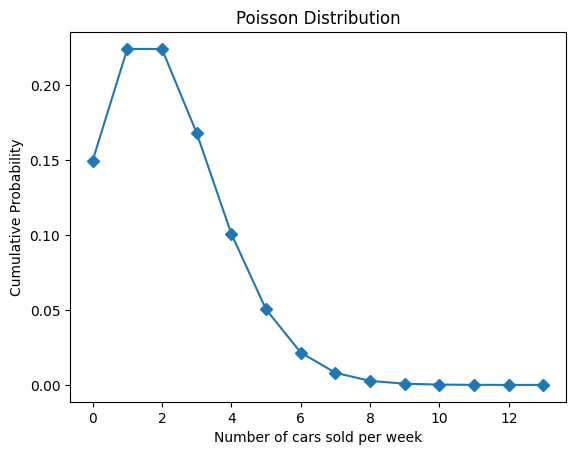

In [16]:
l = 3
k = np.arange(1,15,1)
p = poisson.pmf(k,l)
plt.plot(p,'D-')
plt.title('Poisson Distribution')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative Probability');

> #### **Part 1 : Question 4**
> #### <font color='green'> Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions. [3 Marks]</font>
<hr>
<ul><li>
4.A. What is the probability that all three orders will be recognised correctly? [1 Mark]

In [17]:
# Function to calculate combination (nCk)
def nCk(n, k):
  return math.comb(n,k)

In [18]:
def Pk(p, n, k):
  return nCk(n,k) * (p**k) * ((1-p)**(n-k))

In [19]:
p = 0.868
n = 3
k = 3

prob = Pk(p, n, k)
print('Probability of recognizing 3 orders correctly is',str(np.around(prob,4)))

Probability of recognizing 3 orders correctly is 0.654


<hr>
<ul><li>
4.B. What is the probability that none of the three orders will be recognised correctly? [1 Mark]

In [20]:
p = 0.868
n = 3
k = 0

prob = Pk(p, n, k)
print('Probability of not recognizing any order correctly is',str(np.around(prob,4)))

Probability of not recognizing any order correctly is 0.0023


<hr>
<ul><li>
4.C. What is the probability that at least two of the three orders will be recognised correctly? [1 Mark]

In [21]:
p = 0.868
n = 3

# probability that 2 orders will be recognized correctly
k = 2
prob1 = Pk(p, n, k)

# probability that 3 orders will be recognized correctly
k = 3
prob2 = Pk(p, n, k)

# probability that atleast 2 orders will be recognized correctly 
prob = prob1 + prob2
print('Probability of recognizing atleast 2 orders correctly is',str(np.around(prob,4)))

Probability of recognizing atleast 2 orders correctly is 0.9523


> #### **Part 1 : Question 5**
> #### <font color='green'> Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution.** [3 Marks] </font>

Part 2

> ### Part 2 : Question 1
> Read the data set, clean the data and prepare final dataset to be used for analysis. [10 Marks]


In [38]:
bb = pd.read_csv('/content/drive/MyDrive/datasets/DS+-+Part2+-+Basketball.csv')

In [39]:
bb.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [40]:
bb = bb.replace('-', np.NaN)

In [41]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   9 non-null      object
 10  Runner-up            13 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [42]:
bbcln = bb.drop(columns=['TournamentChampion', 'Runner-up'])

In [43]:
i = bbcln[bbcln['Score'].isna()].index

In [44]:
# Team 61 has played only 1 tournament and there is no data for this team 
# Best to delete this row from the analysis & include when more details are available
bbcln.drop(i, inplace=True)

In [45]:
bbcln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TeamLaunch           60 non-null     object
 10  HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 5.3+ KB


In [46]:
bbcln = bbcln.astype('int', errors='ignore')

In [47]:
bbcln['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56'], dtype=object)

In [48]:
# Consider only the first year provide in Team Launch Range as the Launch Year
bbcln['TeamLaunch'] = bbcln['TeamLaunch'].str[:4]

In [49]:
bbcln = bbcln.astype('int', errors='ignore')

In [50]:
bbcln['Score'] = bbcln['Score'].astype('int')
bbcln['PlayedGames'] = bbcln['PlayedGames'].astype('int')
bbcln['WonGames'] = bbcln['WonGames'].astype('int')
bbcln['DrawnGames'] = bbcln['DrawnGames'].astype('int')
bbcln['LostGames'] = bbcln['LostGames'].astype('int')
bbcln['BasketScored'] = bbcln['BasketScored'].astype('int')
bbcln['BasketGiven'] = bbcln['BasketGiven'].astype('int')

In [51]:
bbcln.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1957.950000,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,26.646732,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1934.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,1950.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,1977.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,2016.000000,20.000000


> ### Part 2 : Question 2
> Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a detailed performance report using this data. [10 Marks]

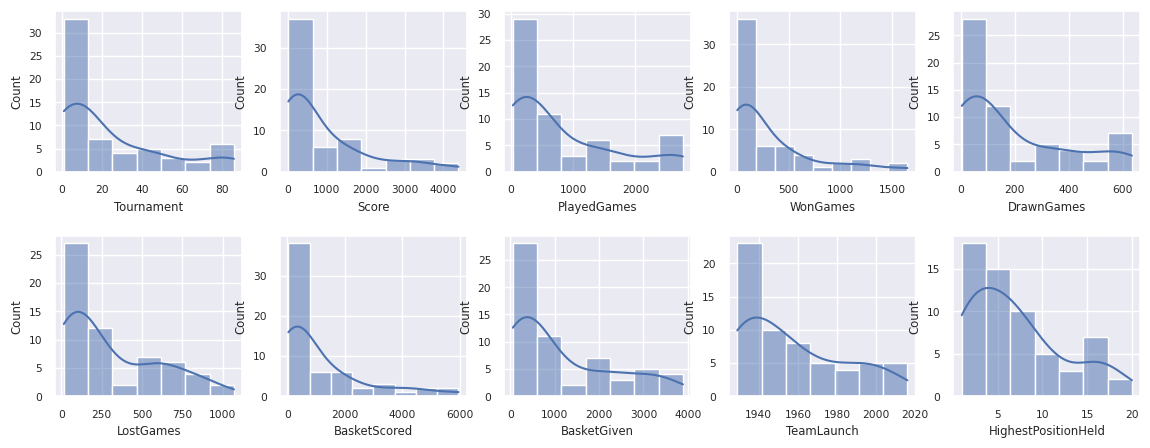

In [36]:
# Univariate analysis of all columns 

numcols = bbcln.select_dtypes(include=np.number).columns.tolist()
sns.set(font_scale=0.7)
fig, ax = plt.subplots(2,5,figsize=(14,5))
plt.subplots_adjust(hspace=0.4)
for i, col in enumerate(numcols):  
  sns.histplot(bbcln[col], kde=True, ax=ax[i//5,i%5])
plt.show()

**More than half the teams (33-34) have played < 20 tournaments, however only 5-6 teams were launched after 2000. This shows that there are approx 20 teams that have been around for more than 20 years and have played less than 20 tournaments.**

<hr>
<ul><li>
A short list of good teams can be identified by filtering for teams that have played more than 20 tournaments, or those that have < 20 tournaments but were in the top 10 positions and were launched after 1990 - this gives us 26 teams.

In [37]:
bbgoodteams = bbcln[((bbcln['Tournament']<20)&(bbcln['TeamLaunch']>1990)&(bbcln['HighestPositionHeld']<10))|(bbcln['Tournament']>20)]



> Indented block

